In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [56]:
airdf = pd.read_csv('Dataset\Kag_Airbag.csv', index_col=0)

In [57]:
airdf.head()

,dvcat,weight,dead,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,caseid
1,25-39,25.069,alive,none,belted,1,f,26,1997,1990.0,unavail,driver,0,3.0,2:3:1
2,10-24,25.069,alive,airbag,belted,1,f,72,1997,1995.0,deploy,driver,1,1.0,2:3:2
3,10-24,32.379,alive,none,none,1,f,69,1997,1988.0,unavail,driver,0,4.0,2:5:1
4,25-39,495.444,alive,airbag,belted,1,f,53,1997,1995.0,deploy,driver,1,1.0,2:10:1
5,25-39,25.069,alive,none,belted,1,f,32,1997,1988.0,unavail,driver,0,3.0,2:11:1


In [58]:
airdf.tail()

,dvcat,weight,dead,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,caseid
26213,25-39,3179.688,alive,none,belted,1,m,17,2002,1985.0,unavail,driver,0,0.0,82:107:1
26214,10-24,71.228,alive,airbag,belted,1,m,54,2002,2002.0,nodeploy,driver,0,2.0,82:108:2
26215,10-24,10.474,alive,airbag,belted,1,f,27,2002,1990.0,deploy,driver,1,3.0,82:110:1
26216,25-39,10.474,alive,airbag,belted,1,f,18,2002,1999.0,deploy,driver,1,0.0,82:110:2
26217,25-39,10.474,alive,airbag,belted,1,m,17,2002,1999.0,deploy,pass,1,0.0,82:110:2


In [59]:
airdf.shape

(26217, 15)

In [60]:
airdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26217 entries, 1 to 26217
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dvcat        26217 non-null  object 
 1   weight       26217 non-null  float64
 2   dead         26217 non-null  object 
 3   airbag       26217 non-null  object 
 4   seatbelt     26217 non-null  object 
 5   frontal      26217 non-null  int64  
 6   sex          26217 non-null  object 
 7   ageOFocc     26217 non-null  int64  
 8   yearacc      26217 non-null  int64  
 9   yearVeh      26216 non-null  float64
 10  abcat        26217 non-null  object 
 11  occRole      26217 non-null  object 
 12  deploy       26217 non-null  int64  
 13  injSeverity  26064 non-null  float64
 14  caseid       26217 non-null  object 
dtypes: float64(3), int64(4), object(8)
memory usage: 3.2+ MB


# To check missing values :

In [61]:
airdf.isnull().sum()

dvcat            0
weight           0
dead             0
airbag           0
seatbelt         0
frontal          0
sex              0
ageOFocc         0
yearacc          0
yearVeh          1
abcat            0
occRole          0
deploy           0
injSeverity    153
caseid           0
dtype: int64

# Checking the columns with null values: 

In [62]:
airdf[airdf['yearVeh'].isnull() == True]

,dvcat,weight,dead,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,caseid
1148,10-24,8521.81,alive,airbag,belted,1,m,27,1997,NaN,deploy,driver,1,0.0,11:138:1


In [63]:
airdf[airdf['injSeverity'].isnull() == True]

,dvcat,weight,dead,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,caseid
639,10-24,404.972,alive,none,belted,0,f,36,1997,1984.0,unavail,driver,0,NaN,8:66:2
863,25-39,34.952,alive,none,none,1,m,22,1997,1993.0,unavail,driver,0,NaN,9:38:1
1208,10-24,119.699,alive,none,belted,0,f,80,1997,1981.0,unavail,pass,0,NaN,11:186:1
1254,10-24,3495.253,alive,none,belted,0,f,27,1997,1984.0,unavail,pass,0,NaN,12:25:2
1342,10-24,34.053,alive,airbag,belted,1,m,23,1997,1995.0,deploy,driver,1,NaN,12:90:1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25461,10-24,548.186,alive,airbag,belted,1,m,25,2002,1999.0,deploy,pass,1,NaN,75:47:1
25465,10-24,440.426,alive,airbag,belted,1,m,22,2002,1999.0,nodeploy,pass,0,NaN,75:49:1
25981,10-24,20.409,alive,none,belted,1,f,17,2002,1987.0,unavail,pass,0,NaN,81:10:2
26043,25-39,392.914,alive,airbag,belted,1,f,59,2002,1999.0,nodeploy,pass,0,NaN,81:71:1


# To check duplicate values :

In [64]:
airdf.duplicated().any()

False

# Summary Statistics for numeric values :

In [65]:
 airdf.describe()

,weight,frontal,ageOFocc,yearacc,yearVeh,deploy,injSeverity
count,26217.000000,26217.000000,26217.000000,26217.000000,26216.000000,26217.000000,26064.000000
mean,462.811611,0.643323,37.206202,1999.555556,1992.804699,0.337033,1.715508
std,1524.844430,0.479027,17.909317,1.702546,5.594990,0.472705,1.293357
min,0.000000,0.000000,16.000000,1997.000000,1953.000000,0.000000,0.000000
25%,32.467000,0.000000,22.000000,1998.000000,1989.000000,0.000000,1.000000
50%,86.986000,1.000000,33.000000,2000.000000,1994.000000,0.000000,2.000000
75%,364.717000,1.000000,48.000000,2001.000000,1997.000000,1.000000,3.000000
max,57871.595000,1.000000,97.000000,2002.000000,2003.000000,1.000000,6.000000


## Key Observations : 

### Average year of accident is 1999 in the dataset.
### Average age of occupant in the vehicle is 37 years with minimum age being 16 and maximum age being 97 years.
### Minimum year of vehicle is 1953 , while maximum is 2003. Average year is 1992

# Summary statistics for object datatype : 

In [66]:
airdf.describe(include=['O'])

,dvcat,dead,airbag,seatbelt,sex,abcat,occRole,caseid
count,26217,26217,26217,26217,26217,26217,26217,26217
unique,5,2,2,2,2,3,2,9409
top,10-24,alive,airbag,belted,m,unavail,driver,13:157:1
freq,12848,25037,14419,18573,13969,11798,20601,11


In [67]:
airdf['occRole'].unique()

array(['driver', 'pass'], dtype=object)

### There are two unique values in vehicle occupant role : Driver and Passenger
### Top category is driver


# Count of Unique values of Injury Severity :

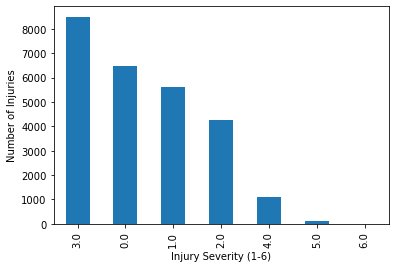

In [68]:
airdf['injSeverity'].value_counts().plot.bar()
plt.xlabel('Injury Severity (1-6)')
plt.ylabel('Number of Injuries')
plt.show()

### It can be observed that most injuries severity level was 3 followed by 0 and 1.

## Count plot of Frontal & Non- Frontal impact :

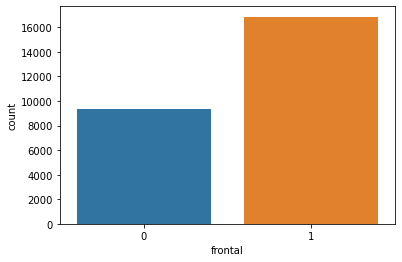

In [69]:
sns.countplot(data=airdf, x = 'frontal')
plt.show()

### Here, it can be observed that around 16000 crashes had a frontal impact (1 for frontal, 0 for non-frontal) ,while around 9000 crashes were non- frontal

### Plotting missing values :

<Figure size 720x432 with 0 Axes>

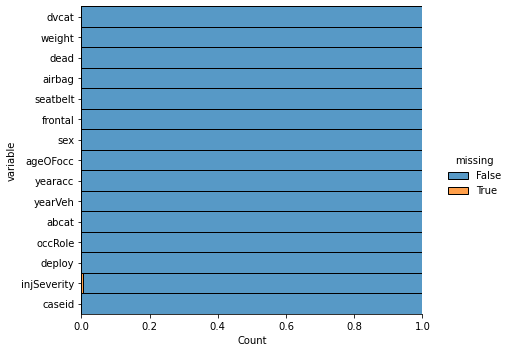

In [70]:
plt.figure(figsize=(10,6))
sns.displot(
    data=airdf.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)
plt.show()

## Count of unique values of airbag column : 

In [71]:
airdf['airbag'].value_counts()

airbag    14419
none      11798
Name: airbag, dtype: int64

## Visualization to see the number of casualties, that resulted in death or survived :

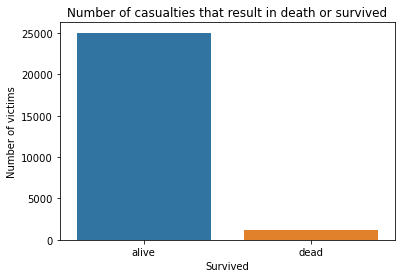

In [72]:
sns.countplot(data=airdf, x='dead')
plt.xlabel("Survived")
plt.ylabel("Number of victims")
plt.title("Number of casualties that result in death or survived")
plt.show()

### It is very obvious from the count plot displayed above, that major proportion of people survived the crash

In [74]:
airdf['dvcat'].value_counts().sort_index()

1-9km/h      686
10-24      12848
25-39       8214
40-54       2977
55+         1492
Name: dvcat, dtype: int64

## To check correlation :

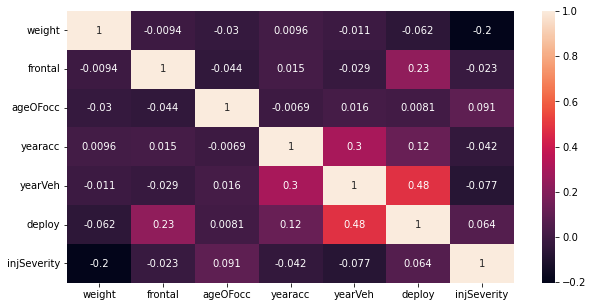

In [75]:
plt.figure(figsize=(10,5))
sns.heatmap(airdf.corr(),annot=True) 
plt.show()

### There is a weak positive correlation (0.48) between year of vehicle and whether the airbag was deployed or not.

# Number of accidents year wise :

In [76]:
airdf.groupby('yearacc').size()

yearacc
1997    3975
1998    4427
1999    4516
2000    4420
2001    4115
2002    4764
dtype: int64

## Number of deaths when seatbelt was worn and airbag was deployed during the accident

In [77]:
condition1 = airdf[(airdf['seatbelt'] == 'belted') & (airdf['deploy'] == 1)]

In [78]:
condition1[condition1['dead'] == 'dead']

,dvcat,weight,dead,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,caseid
321,10-24,13.374,dead,airbag,belted,1,m,37,1997,1995.0,deploy,driver,1,4.0,4:104:2
492,25-39,7.532,dead,airbag,belted,0,f,63,1997,1995.0,deploy,pass,1,3.0,6:38:2
498,40-54,15.273,dead,airbag,belted,0,m,70,1997,1990.0,deploy,driver,1,4.0,6:44:2
546,55+,7.757,dead,airbag,belted,0,f,25,1997,1994.0,deploy,driver,1,4.0,6:122:3
827,25-39,42.012,dead,airbag,belted,0,m,26,1997,1994.0,deploy,driver,1,4.0,9:11:1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25674,55+,124.428,dead,airbag,belted,1,m,18,2002,2001.0,deploy,pass,1,4.0,76:97:1
25740,25-39,65.372,dead,airbag,belted,1,f,87,2002,1999.0,deploy,driver,1,4.0,78:39:1
25746,25-39,76.202,dead,airbag,belted,0,m,73,2002,1994.0,deploy,driver,1,4.0,78:52:1
25948,55+,7.387,dead,airbag,belted,0,m,86,2002,2002.0,deploy,driver,1,4.0,79:121:1


### 154 cases which resulted in death of occupant.

In [79]:
airdf['dvcat'].unique()

array(['25-39', '10-24', '40-54', '55+', '1-9km/h'], dtype=object)

# Number of deaths when impact speed was 55+ :

In [80]:
airdf[(airdf['dvcat'] == '55+') & (airdf['dead'] == 'dead')]

,dvcat,weight,dead,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,caseid
8,55+,27.078,dead,none,none,1,m,32,1997,1987.0,unavail,driver,0,4.0,2:13:2
83,55+,27.078,dead,none,belted,1,m,67,1997,1992.0,unavail,driver,0,4.0,2:79:1
84,55+,27.078,dead,none,belted,1,f,64,1997,1992.0,unavail,pass,0,4.0,2:79:1
265,55+,13.374,dead,none,none,1,m,23,1997,1986.0,unavail,driver,0,4.0,4:58:1
317,55+,13.374,dead,none,none,0,m,34,1997,1990.0,unavail,driver,0,4.0,4:100:1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25949,55+,7.387,dead,airbag,belted,0,f,86,2002,2002.0,deploy,pass,1,4.0,79:121:1
25952,55+,7.387,dead,none,belted,1,m,33,2002,1988.0,unavail,driver,0,4.0,79:122:1
25993,55+,24.828,dead,none,belted,0,m,26,2002,1991.0,unavail,driver,0,4.0,81:21:1
26081,55+,25.273,dead,none,none,0,f,58,2002,1986.0,unavail,driver,0,3.0,81:101:1


### 415 cases where impact speed was 55+ and resulted in death of occupant.

# Dataset 2 : Accident

In [81]:
accdf = pd.read_excel('Dataset/road-accident.xlsx')
accdf

,Number of Vehicles,Accident Date,Time (24hr),Road Surface,Lighting Conditions,Weather Conditions,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty,Type of Vehicle
0,1,2009-01-01,55,Dry,Darkness: street lights present and lit,Fine without high winds,Pedestrian,Slight,Male,44,Car
1,1,2009-01-02,2335,Dry,Darkness: street lights present and lit,Fine without high winds,Driver,Serious,Female,23,Car
2,1,2009-01-02,1645,Dry,Darkness: street lights present and lit,Fine without high winds,Pedestrian,Slight,Female,12,Car
3,1,2009-01-02,1723,Dry,Darkness: street lights present and lit,Fine without high winds,Pedestrian,Slight,Male,15,Car
4,2,2009-01-02,1350,Dry,Daylight: street lights present,Fine without high winds,Driver,Slight,Female,34,Car
...,...,...,...,...,...,...,...,...,...,...,...
12985,2,2016-12-24,1325,Wet / Damp,Daylight: street lights present,Raining without high winds,Driver or rider,Slight,Female,43,Car
12986,2,2016-12-24,1325,Wet / Damp,Daylight: street lights present,Raining without high winds,Vehicle or pillion passenger,Slight,Male,15,Car
12987,2,2016-12-26,2304,Dry,Darkness: street lights present and lit,Fine without high winds,Vehicle or pillion passenger,Serious,Female,26,Taxi/Private hire car
12988,2,2016-12-26,2304,Dry,Darkness: street lights present and lit,Fine without high winds,Driver or rider,Serious,Male,66,Taxi/Private hire car


In [82]:
accdf.head()

,Number of Vehicles,Accident Date,Time (24hr),Road Surface,Lighting Conditions,Weather Conditions,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty,Type of Vehicle
0,1,2009-01-01,55,Dry,Darkness: street lights present and lit,Fine without high winds,Pedestrian,Slight,Male,44,Car
1,1,2009-01-02,2335,Dry,Darkness: street lights present and lit,Fine without high winds,Driver,Serious,Female,23,Car
2,1,2009-01-02,1645,Dry,Darkness: street lights present and lit,Fine without high winds,Pedestrian,Slight,Female,12,Car
3,1,2009-01-02,1723,Dry,Darkness: street lights present and lit,Fine without high winds,Pedestrian,Slight,Male,15,Car
4,2,2009-01-02,1350,Dry,Daylight: street lights present,Fine without high winds,Driver,Slight,Female,34,Car


In [83]:
accdf.tail()

,Number of Vehicles,Accident Date,Time (24hr),Road Surface,Lighting Conditions,Weather Conditions,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty,Type of Vehicle
12985,2,2016-12-24,1325,Wet / Damp,Daylight: street lights present,Raining without high winds,Driver or rider,Slight,Female,43,Car
12986,2,2016-12-24,1325,Wet / Damp,Daylight: street lights present,Raining without high winds,Vehicle or pillion passenger,Slight,Male,15,Car
12987,2,2016-12-26,2304,Dry,Darkness: street lights present and lit,Fine without high winds,Vehicle or pillion passenger,Serious,Female,26,Taxi/Private hire car
12988,2,2016-12-26,2304,Dry,Darkness: street lights present and lit,Fine without high winds,Driver or rider,Serious,Male,66,Taxi/Private hire car
12989,4,2016-12-31,2346,Wet / Damp,Darkness: street lights present and lit,Raining without high winds,Driver or rider,Slight,Male,27,Car


In [84]:
accdf.shape

(12990, 11)

In [85]:
accdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12990 entries, 0 to 12989
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Number of Vehicles   12990 non-null  int64         
 1   Accident Date        12990 non-null  datetime64[ns]
 2   Time (24hr)          12990 non-null  int64         
 3   Road Surface         12990 non-null  object        
 4   Lighting Conditions  12990 non-null  object        
 5   Weather Conditions   12990 non-null  object        
 6   Casualty Class       12990 non-null  object        
 7   Casualty Severity    12990 non-null  object        
 8   Sex of Casualty      12990 non-null  object        
 9   Age of Casualty      12990 non-null  int64         
 10  Type of Vehicle      12990 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 1.1+ MB


In [86]:
accdf.isna().sum()

Number of Vehicles     0
Accident Date          0
Time (24hr)            0
Road Surface           0
Lighting Conditions    0
Weather Conditions     0
Casualty Class         0
Casualty Severity      0
Sex of Casualty        0
Age of Casualty        0
Type of Vehicle        0
dtype: int64

# Summary Statistics for Numeric Data :

In [87]:
accdf.describe()

,Number of Vehicles,Time (24hr),Age of Casualty
count,12990.000000,12990.000000,12990.000000
mean,1.934334,1397.614858,34.885527
std,0.860014,522.697100,18.223201
min,1.000000,0.000000,0.000000
25%,1.000000,1036.000000,21.000000
50%,2.000000,1450.000000,31.000000
75%,2.000000,1750.000000,46.000000
max,14.000000,2358.000000,98.000000


# Summary Statistics for object datatype :

In [88]:
accdf.describe(include=['O'])

,Road Surface,Lighting Conditions,Weather Conditions,Casualty Class,Casualty Severity,Sex of Casualty,Type of Vehicle
count,12990,12990,12990,12990,12990,12990,12990
unique,8,6,10,5,3,2,28
top,Dry,Daylight: street lights present,Fine without high winds,Driver,Slight,Male,Car
freq,9430,8930,11113,6455,11496,7679,9066


# Key Observations :

### Vehicle type which was involved the most during the crash was car and the class of the casuality was driver

In [89]:
accdf['Road Surface'].unique()

array(['Dry', 'Wet / Damp', 'Frost / Ice', 'Snow', 'Flood', 'Frost/ Ice',
       5, 'Flood (surface water over 3cm deep)'], dtype=object)

In [90]:
accdf['Lighting Conditions'].value_counts()

Daylight: street lights present              8930
Darkness: street lights present and lit      2808
Darkness: street lighting unknown            1013
Darkness: no street lighting                  215
Darkness: street lights present but unlit      15
5                                               9
Name: Lighting Conditions, dtype: int64

In [91]:
accdf['Weather Conditions'].value_counts()

Fine without high winds       11113
Raining without high winds     1221
Raining with high winds         173
Fine with high winds            138
Other                           111
Snowing without high winds      106
Unknown                          57
Fog or mist – if hazard          43
Fog or mist â€“ if hazard        17
Snowing with high winds          11
Name: Weather Conditions, dtype: int64

In [92]:
accdf['Casualty Class'].value_counts()

Driver                          6455
Passenger                       3264
Pedestrian                      1839
Driver or rider                 1000
Vehicle or pillion passenger     432
Name: Casualty Class, dtype: int64

In [93]:
accdf['Casualty Severity'].value_counts()

Slight     11496
Serious     1391
Fatal        103
Name: Casualty Severity, dtype: int64

In [94]:
accdf['Sex of Casualty'].value_counts()

Male      7679
Female    5311
Name: Sex of Casualty, dtype: int64

In [95]:
accdf['Type of Vehicle'].unique()

array(['Car', 'Bus or coach (17 or more passenger seats)',
       'Taxi/Private hire car', 'M/cycle 50cc and under', 'Pedal cycle',
       'Other Vehicle ', 'Motorcycle over 125cc and up to 500cc',
       'Motorcycle over 50cc and up to 125cc',
       'Goods vehicle 3.5 tonnes mgw and under', 'Motorcycle over 500cc',
       'Goods vehicle over 3.5 tonnes and under 7.5 tonnes mgw',
       'Goods vehicle 7.5 tonnes mgw and over',
       'Minibus (8 – 16 passenger seats)',
       'Agricultural vehicle (includes diggers etc.)', 'Ridden horse',
       'Pedal cycleCar', 'Pedal cyclePedal cycle',
       'Motorcycle over Motorcycle over 500cc0cc and up to [Not used]Motorcycle over 500cccc',
       'M/cycle Motorcycle over 500cc0cc and under',
       'M/cycle Motorcycle over 500cc0cc and under0', 'Car0',
       'M/cycle Motorcycle over 500cc0cc and underPedal cycle',
       'Motorcycle over [Not used]Motorcycle over 500cccc and up to Motorcycle over 500cc00cc',
       'Pedal cycle[Not used]', '

In [96]:
accdf['Type of Vehicle'].nunique()

28

# To check outliers :

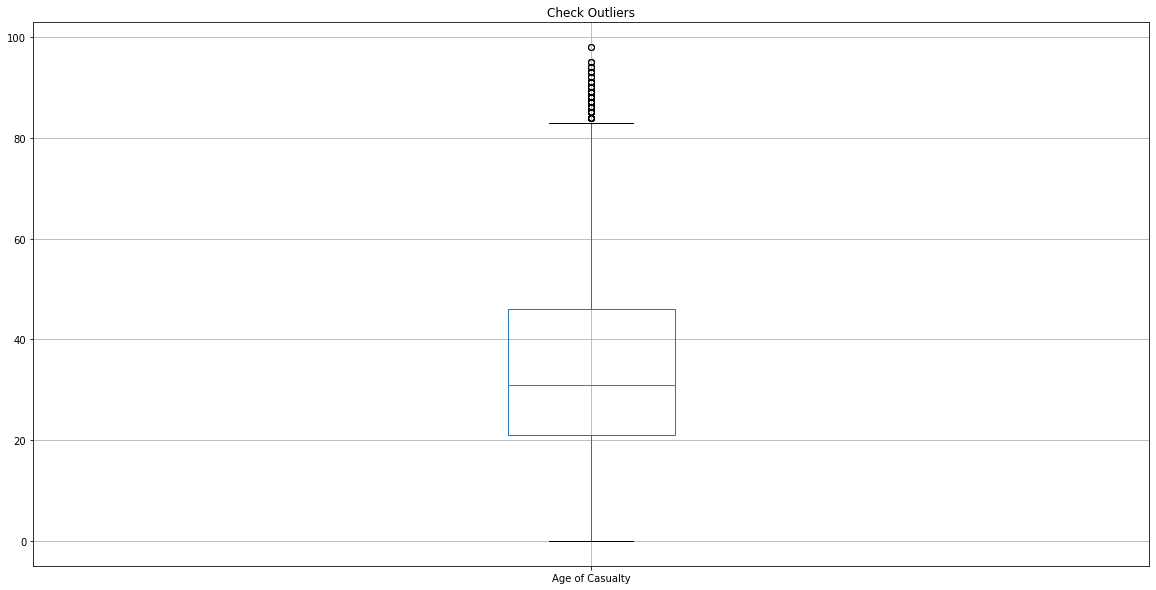

In [105]:
plt.figure(figsize=(20,10))
accdf.boxplot('Age of Casualty')
plt.title("Check Outliers")
plt.show()

# Displot to see the Distribution of Age of Casualty :

<Figure size 864x360 with 0 Axes>

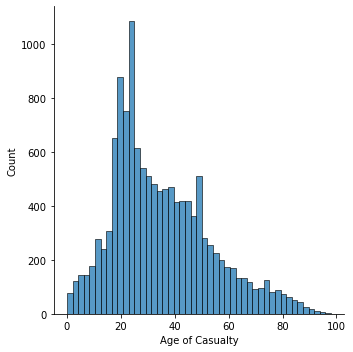

In [99]:
plt.figure(figsize = (12, 5))
sns.displot(accdf['Age of Casualty'])
plt.show()

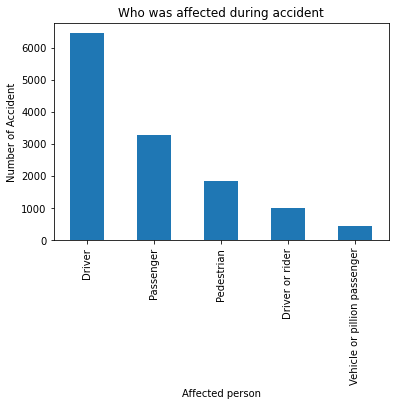

In [100]:
accdf['Casualty Class'].value_counts().plot.bar()
plt.xlabel('Affected person')
plt.ylabel('Number of Accident')
plt.title('Who was affected during accident')
plt.show()

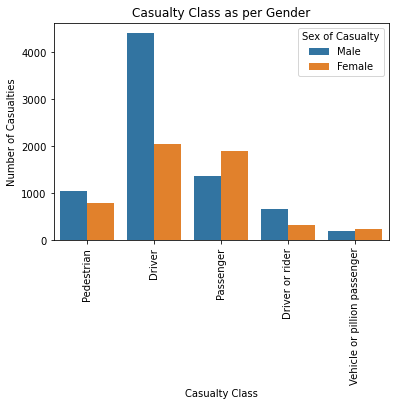

In [111]:
affected_person = sns.countplot(data = accdf, x = 'Casualty Class', hue = 'Sex of Casualty')
affected_person.tick_params(axis='x', rotation=90)
plt.xlabel('Casualty Class')
plt.ylabel('Number of Casualties')
plt.title('Casualty Class as per Gender')
plt.show()